# Michael Mascilli

# Introduction
## This dataset consists of information regarding traffic in various neighborhoods in Pittsburgh. Of the datapoints in each column, I decided that average_daily_car_traffic and percent_over_limit would be the most relevent, so those are the factors that I am keeping track of. 

## My goal is to do the following: 
## 1. Create a dictionary of neighborhoods and average_daily_car_traffic 
## 2. Create a dictionary of neighborhoods and percent_over_limit 
## 3. Check which neighborhoods have the least amount of traffic
## 4. Check which neighborhoods have the least percent_over_limit
## 5. Output the results in a meaningful manner

In [2]:
import pandas as pd

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

chip = pd.read_csv("City-Of-Pittsburgh-Traffic-Count.csv")
chip.head()

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


## As we can see, there are multiple datapoints for some neighborhoods. This means I will have to calculate the averages of the datapoints for each neighborhood.

In [3]:
# This will display each unique item and how many of them there are
chip['neighborhood'].value_counts()

Squirrel Hill South    28
Bloomfield             21
Shadyside              18
Highland Park          16
Mount Washington       16
                       ..
Duquesne Heights        1
Middle Hill             1
Lincoln Place           1
Fineview                1
East Allegheny          1
Name: neighborhood, Length: 74, dtype: int64

## There are also some neighborhoods that do not have a datapoint for the submetrics we are taking into consideration. Because of this, I needed to create a query that eliminated the neighborhoods that lacked datapoints for the submetrics.

In [4]:
traffic = {}

# Create a dictionary based off the item name and the quantity of that item
for index, row in chip.iterrows():
    # We must include the second condition since the first time we add a neighborhood, it might be NaN, which we cannot use
    if row["neighborhood"] not in traffic and row["average_daily_car_traffic"] != "NaN":
        traffic[row["neighborhood"]] = row["average_daily_car_traffic"]
        
# specify the column names separately
column_names = ["frequency"]
items = pd.DataFrame(traffic, column_names)
items

,Polish Hill,Central Lawrenceville,Windgap,Squirrel Hill South,Perry North,Central Northside,Squirrel Hill North,Central Oakland,East Liberty,Greenfield,...,New Homestead,Lincoln Place,NaN,Oakwood,Banksville,Chartiers City,Summer Hill,Troy Hill,Middle Hill,Crawford-Roberts
frequency,4949.0,NaN,NaN,2741.0,NaN,1046.0,NaN,NaN,NaN,NaN,...,666.0,126.0,NaN,NaN,NaN,2571.0,937.0,NaN,NaN,NaN


## I must create a query for the average_daily_car_traffic and create a new dataframe from those datapoints to only include the datapoints that have numbers.
## I then create a dictionary from the lists of neighborhoods and average daily car traffic to then display the 5 neighborhoods that have the lowest amount of daily traffic.
## We have data on 65 out of the 75 neighborhoods in the dataset, which is good enough to go off of.

In [4]:
import statistics as st
# We cut out the rows in which the average_daily_car_traffic is nan
chip.dropna(subset=["average_daily_car_traffic"],inplace=True)
traffic_count = []
temp_array = []
neighborhoods = []
traffic_dictionary = {}
lowest_traffic = []
top_neighborhoods = []
# take each traffic count data point for all neighborhoods, calculate an average, and then create a dataframe from it

# Start by creating an list of all the neighborhoods
for index, row in chip.iterrows():
    if row["neighborhood"] not in neighborhoods:
        neighborhoods.append(row["neighborhood"])
# Now for each neighborhood, add each datapoint it has to a list, calculate the average, then append that list to traffic_count
for neighborhood in neighborhoods:
    for index, row in chip.iterrows():
        if row["neighborhood"] == neighborhood:
                temp_array.append(row["average_daily_car_traffic"])
    
    # After we add the datapoints for the neighborhood, we calculate the average and then add it to traffic count
    if len(temp_array) > 0:
        traffic_average = st.mean(temp_array)
    traffic_count.append(traffic_average)
    # Now we clear temp_array for use in the next iteration of the loop
    temp_array.clear()

# Print the final product
traffic_dictionary = {neighborhoods[i]: traffic_count[i] for i in range(len(neighborhoods))}
print(traffic_dictionary)

print("")

# Print out the top 5 neighborhoods with the least amount of daily traffic
print("Top five neighborhoods with the least amount of daily traffic:")
for item in range(5):
    best_neighborhood = min(traffic_dictionary, key=traffic_dictionary.get)
    print(str(item + 1) + ". " + best_neighborhood + ": " + str(traffic_dictionary[best_neighborhood]) + " cars")
    
    # Add the value of the neighborhood to this array so we can later display the top five in a bar graph
    lowest_traffic.append(traffic_dictionary[best_neighborhood])
    top_neighborhoods.append(best_neighborhood)
    traffic_dictionary.pop(best_neighborhood)

{'Polish Hill': 2649.0, 'Squirrel Hill South': 3050.076923076923, 'Central Northside': 1189.0, 'Bluff': 1788.3333333333333, 'Crafton Heights': 11500.0, 'Shadyside': 4408.8, 'Highland Park': 1564.7333333333333, 'North Shore': 10350.0, 'East Liberty': 4658.818181818182, 'Mount Washington': 5259.555555555556, 'Brookline': 3914.4, 'Squirrel Hill North': 3939.1111111111113, 'Bloomfield': 3078.6428571428573, 'Larimer': 3771.3, 'Friendship': 2443.5, 'Point Breeze': 3905.25, 'Regent Square': 16729.0, 'Central Lawrenceville': 2249.8333333333335, 'Knoxville': 3823.0, 'Central Oakland': 3768.6666666666665, 'Strip District': 9691.666666666666, 'Greenfield': 2386.0, 'Windgap': 1531.0, 'Beechview': 1418.3333333333333, 'Upper Hill': 953.3333333333334, 'Stanton Heights': 4068.0, 'Manchester': 2129.3, 'South Side Slopes': 3778.1428571428573, 'Perry North': 2123.777777777778, 'North Oakland': 5955.25, 'East Hills': 8126.5, 'Duquesne Heights': 5831.0, 'Sheraden': 2844.0, 'Morningside': 2049.285714285714,

## Here is a bar graph of the 5 neighborhoods with the lowest amount of daily traffic

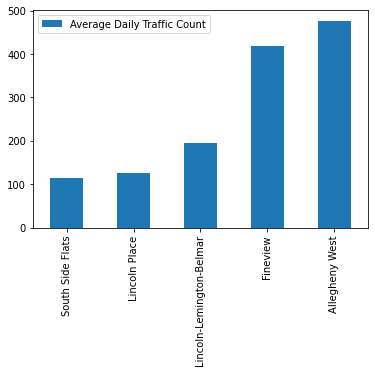

In [5]:
# create a new DataFrame to use for the 
df_traffic = pd.DataFrame(lowest_traffic, 
                   columns=['Average Daily Traffic Count'], 
                   index=top_neighborhoods)

# Plot a bar chart
df_traffic.plot(kind="bar")

## Now we create a DataFrame of all the data and store it for use by others.

In [37]:
import statistics as st
# We cut out the rows in which the average_daily_car_traffic is nan
chip.dropna(subset=["average_daily_car_traffic"],inplace=True)
traffic_count = []
temp_array = []
neighborhoods = []
traffic_dictionary = {}
lowest_traffic = []
top_neighborhoods = []
# take each traffic count data point for all neighborhoods, calculate an average, and then create a dataframe from it

# Start by creating an list of all the neighborhoods
for index, row in chip.iterrows():
    if row["neighborhood"] not in neighborhoods:
        neighborhoods.append(row["neighborhood"])
# Now for each neighborhood, add each datapoint it has to a list, calculate the average, then append that list to traffic_count
for neighborhood in neighborhoods:
    for index, row in chip.iterrows():
        if row["neighborhood"] == neighborhood:
                temp_array.append(row["average_daily_car_traffic"])
    
    # After we add the datapoints for the neighborhood, we calculate the average and then add it to traffic count
    if len(temp_array) > 0:
        traffic_average = st.mean(temp_array)
    traffic_count.append(traffic_average)
    # Now we clear temp_array for use in the next iteration of the loop
    temp_array.clear()

# Print the final product
traffic_dictionary = {neighborhoods[i]: traffic_count[i] for i in range(len(neighborhoods))}


print("")

# Print out the top 5 neighborhoods with the least amount of daily traffic
print("Top five neighborhoods with the least amount of daily traffic:")
for item in range(len(traffic_dictionary)):
    best_neighborhood = min(traffic_dictionary, key=traffic_dictionary.get)
    print(str(item + 1) + ". " + str(best_neighborhood) + ": " + str(traffic_dictionary[best_neighborhood]) + " cars")
    
    # Add the value of the neighborhood to this array so we can later display the top five in a bar graph
    lowest_traffic.append(traffic_dictionary[best_neighborhood])
    top_neighborhoods.append(best_neighborhood)
    traffic_dictionary.pop(best_neighborhood)


Top five neighborhoods with the least amount of daily traffic:
1. South Side Flats: 115.0 cars
2. Lincoln Place: 126.0 cars
3. Lincoln-Lemington-Belmar: 195.0 cars
4. Fineview: 419.0 cars
5. Allegheny West: 477.0 cars
6. Knoxville: 527.0 cars
7. New Homestead: 666.0 cars
8. Marshall-Shadeland: 757.25 cars
9. Overbrook: 777.0 cars
10. Summer Hill: 937.0 cars
11. Upper Hill: 953.3333333333334 cars
12. Central Northside: 1189.0 cars
13. Hazelwood: 1289.5 cars
14. Spring Hill-City View: 1293.0 cars
15. Beechview: 1418.3333333333333 cars
16. Windgap: 1531.0 cars
17. Lower Lawrenceville: 1736.0 cars
18. Bluff: 1788.3333333333333 cars
19. East Allegheny: 1924.0 cars
20. Morningside: 2049.285714285714 cars
21. Central Lawrenceville: 2249.8333333333335 cars
22. Arlington: 2285.5 cars
23. Manchester: 2303.6666666666665 cars
24. Central Business District: 2305.0 cars
25. Perry North: 2309.5714285714284 cars
26. Allegheny Center: 2386.0 cars
27. St. Clair: 2436.0 cars
28. Squirrel Hill North: 254

## Here is a bar graph of all the neighborhoods ordered from the lowest amount of daily traffic to the most.

Stored 'df_traffic' (DataFrame)


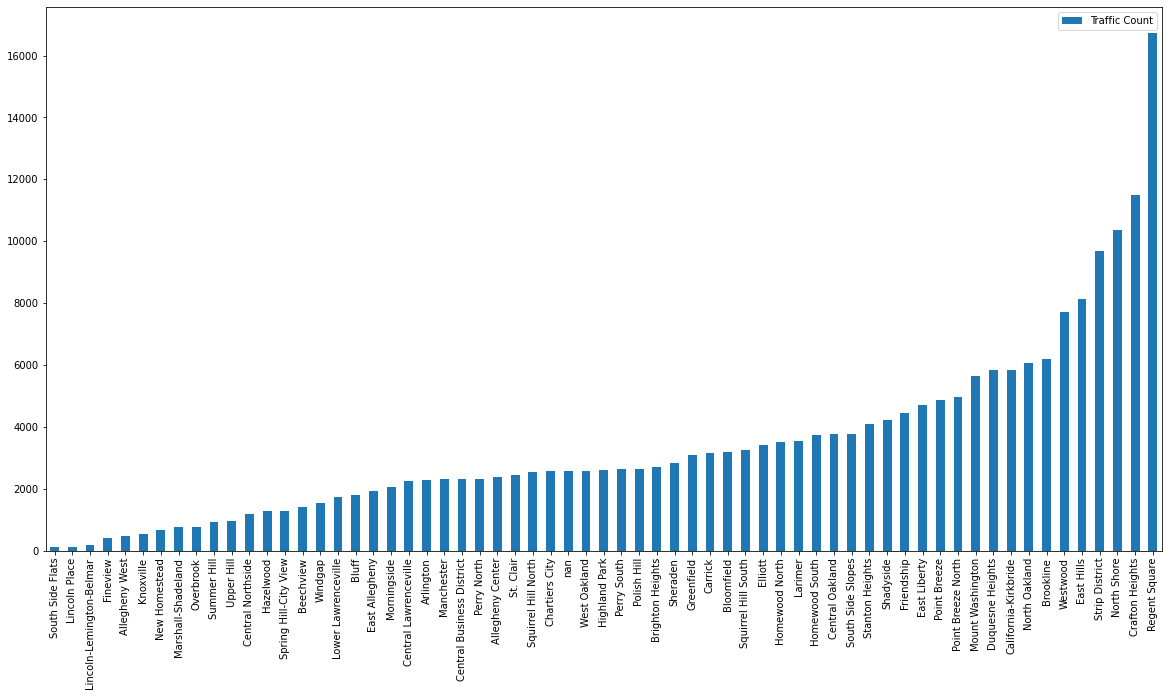

In [39]:
# create a new DataFrame to use for the 
df_traffic = pd.DataFrame(lowest_traffic, 
                   columns=['Traffic Count'], 
                   index=top_neighborhoods)

# Plot a bar chart
df_traffic.plot(kind="bar", figsize=(20,10))

%store df_traffic

## Now we must rewrite the code to track the neighborhoods with the least percent_over_limit.

In [6]:
import statistics as st
# We cut out the rows in which the percent_over_limit is nan
chip.dropna(subset=["percent_over_limit"],inplace=True)
percents = []
temp_array = []
neighborhoods = []
percents_dictionary = {}
top_percents = []
top_neighborhoods = []
# take each percent_over_limit data point for all neighborhoods, calculate an average, and then create a dataframe from it

# Start by creating an list of all the neighborhoods
for index, row in chip.iterrows():
    if row["neighborhood"] not in neighborhoods:
        neighborhoods.append(row["neighborhood"])
# Now for each neighborhood, add each datapoint it has to a list, calculate the average, then append that list to traffic_count
for neighborhood in neighborhoods:
    for index, row in chip.iterrows():
        if row["neighborhood"] == neighborhood:
                temp_array.append(row["percent_over_limit"])
    
    # After we add the datapoints for the neighborhood, we calculate the average and then add it to traffic count
    if len(temp_array) > 0:
        percent_average = st.mean(temp_array)
    percents.append(percent_average)
    # Now we clear temp_array for use in the next iteration of the loop
    temp_array.clear()

# Print the final product
percents_dictionary = {neighborhoods[i]: percents[i] for i in range(len(neighborhoods))}
print(percents_dictionary)

print("")

# Print out the top 5 neighborhoods with the least amount of daily traffic
print("Top five neighborhoods with the least percent of cars going over the speed limit:")
for item in range(5):
    best_neighborhood = min(percents_dictionary, key=percents_dictionary.get)
    print(str(item + 1) + ". " + best_neighborhood + ": " + str(percents_dictionary[best_neighborhood]) + "%")
    
    # Add the value of the neighborhood to this array so we can later display the top five in a bar graph
    top_percents.append(percents_dictionary[best_neighborhood])
    top_neighborhoods.append(best_neighborhood)
    percents_dictionary.pop(best_neighborhood)
    

{'Polish Hill': 45.0, 'Squirrel Hill South': 57.208333333333336, 'Central Northside': 18.4, 'Bluff': 14.666666666666666, 'Crafton Heights': 98.0, 'Highland Park': 32.0, 'North Shore': 78.0, 'East Liberty': 65.625, 'Mount Washington': 75.25, 'Brookline': 61.166666666666664, 'Shadyside': 46.0, 'Squirrel Hill North': 48.57142857142857, 'Bloomfield': 24.75, 'Larimer': 48.77777777777778, 'Friendship': 68.0, 'Point Breeze': 64.5, 'Regent Square': 86.0, 'Central Lawrenceville': 18.5, 'Knoxville': 25.0, 'Central Oakland': 25.666666666666668, 'Strip District': 60.333333333333336, 'Windgap': 36.5, 'Beechview': 59.0, 'Upper Hill': 24.333333333333332, 'Stanton Heights': 81.33333333333333, 'Manchester': 40.111111111111114, 'South Side Slopes': 59.42857142857143, 'Perry North': 57.42857142857143, 'North Oakland': 58.5, 'East Hills': 79.5, 'Duquesne Heights': 48.0, 'Sheraden': 61.0, 'Morningside': 47.0, 'Central Business District': 6.0, 'St. Clair': 85.0, 'Perry South': 25.666666666666668, 'Carrick':

## Here is a bar graph of the five neighborhoods with the least percent over limit.

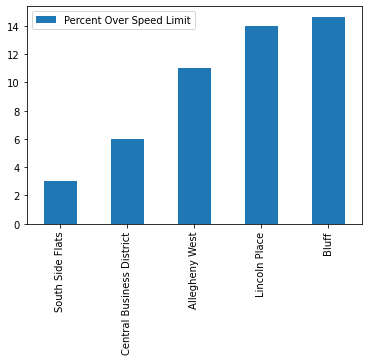

In [7]:
# create a new DataFrame to use for the 
df_percents = pd.DataFrame(top_percents, 
                   columns=['Percent Over Speed Limit'], 
                   index=top_neighborhoods)

# Plot a bar chart
df_percents.plot(kind="bar")



# Once again, we create another DataFrame with the percent over limit to share with others

In [8]:
import statistics as st
# We cut out the rows in which the percent_over_limit is nan
chip.dropna(subset=["percent_over_limit"],inplace=True)
percents = []
temp_array = []
neighborhoods = []
percents_dictionary = {}
top_percents = []
top_neighborhoods = []
# take each percent_over_limit data point for all neighborhoods, calculate an average, and then create a dataframe from it

# Start by creating an list of all the neighborhoods
for index, row in chip.iterrows():
    if row["neighborhood"] not in neighborhoods:
        neighborhoods.append(row["neighborhood"])
# Now for each neighborhood, add each datapoint it has to a list, calculate the average, then append that list to traffic_count
for neighborhood in neighborhoods:
    for index, row in chip.iterrows():
        if row["neighborhood"] == neighborhood:
                temp_array.append(row["percent_over_limit"])
    
    # After we add the datapoints for the neighborhood, we calculate the average and then add it to traffic count
    if len(temp_array) > 0:
        percent_average = st.mean(temp_array)
    percents.append(percent_average)
    # Now we clear temp_array for use in the next iteration of the loop
    temp_array.clear()

# Print the final product
percents_dictionary = {neighborhoods[i]: percents[i] for i in range(len(neighborhoods))}
print(percents_dictionary)

print("")

# Print out the top 5 neighborhoods with the least amount of daily traffic
print("Top five neighborhoods with the least percent of cars going over the speed limit:")
for item in range(len(percents_dictionary)):
    best_neighborhood = min(percents_dictionary, key=percents_dictionary.get)
    print(str(item + 1) + ". " + str(best_neighborhood) + ": " + str(percents_dictionary[best_neighborhood]) + "%")
    
    # Add the value of the neighborhood to this array so we can later display the top five in a bar graph
    top_percents.append(percents_dictionary[best_neighborhood])
    top_neighborhoods.append(best_neighborhood)
    percents_dictionary.pop(best_neighborhood)
    

{'Polish Hill': 45.0, 'Squirrel Hill South': 57.208333333333336, 'Central Northside': 18.4, 'Bluff': 14.666666666666666, 'Crafton Heights': 98.0, 'Highland Park': 32.0, 'North Shore': 78.0, 'East Liberty': 65.625, 'Mount Washington': 75.25, 'Brookline': 61.166666666666664, 'Shadyside': 46.0, 'Squirrel Hill North': 48.57142857142857, 'Bloomfield': 24.75, 'Larimer': 48.77777777777778, 'Friendship': 68.0, 'Point Breeze': 64.5, 'Regent Square': 86.0, 'Central Lawrenceville': 18.5, 'Knoxville': 25.0, 'Central Oakland': 25.666666666666668, 'Strip District': 60.333333333333336, 'Windgap': 36.5, 'Beechview': 59.0, 'Upper Hill': 24.333333333333332, 'Stanton Heights': 81.33333333333333, 'Manchester': 40.111111111111114, 'South Side Slopes': 59.42857142857143, 'Perry North': 57.42857142857143, 'North Oakland': 58.5, 'East Hills': 79.5, 'Duquesne Heights': 48.0, 'Sheraden': 61.0, 'Morningside': 47.0, 'Central Business District': 6.0, 'St. Clair': 85.0, 'Perry South': 25.666666666666668, 'Carrick':

## Here is a bar graph of all the neighborhoods ordered from the lowest percent over limit to the highest.

Stored 'df_percents' (DataFrame)


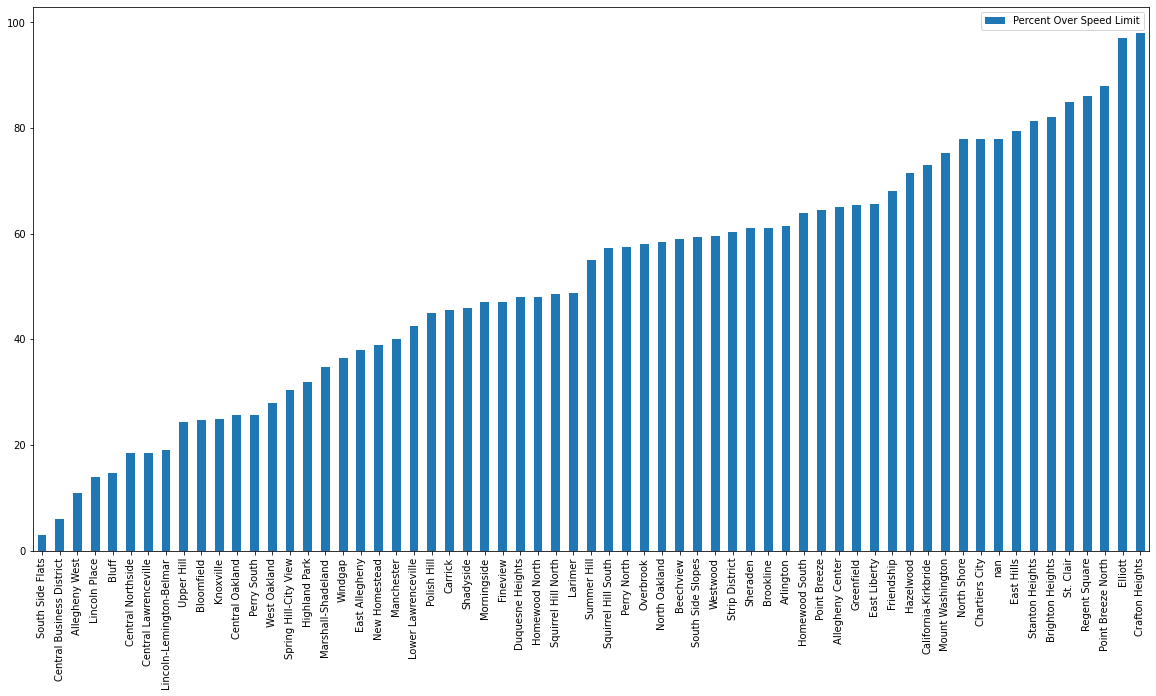

In [9]:
# create a new DataFrame to use for the 
df_percents = pd.DataFrame(top_percents, 
                   columns=['Percent Over Speed Limit'], 
                   index=top_neighborhoods)

# Plot a bar chart
df_percents.plot(kind="bar", figsize=(20,10))

%store df_percents

# Conclusion

## Considering the fact that higher traffic and higher speeds increase the likelyhood of accident and severity of injury, the columns of this data set we are taking into consideration are average_daily_car_traffic and percent_over_limit.

## According to this sub metric, South Side Flats would be the best place to live in terms of its walkability.
## I would prefer to live in bloomfield, since the street I live on (Gross Street) is quiet. Gross Street has great walkability, and when I did research on South Side Flats, it seems that it a popular spot with many places to go to. It seems like a walkable area which would mean that these results are accurate.

# Limitations:
## Not all of the neighborhoods in Pittsburgh have datapoints in this dataset, so their may be even better neighborhoods that simply were not taken into consideration. There are also more datapoints for some neighborhoods than others, which means that the average will be more accurate for some neighborhoods than others. Some of the datapoints could have been taken when there was roadwork being done, which means the data for some neighborhoods may be inaccurate.